In [45]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# File to Load (Remember to Change These)
california_crimes_df = Path("Resources/california_department_of_justice_1998_to_2023-checkpoint.csv")
US_inflation_rates_df = Path("Resources/US_Inflation_Rates_1998_to_2023-checkpoint.csv")

# Read School and Student Data File and store into Pandas DataFrames
california_crimes = pd.read_csv(california_crimes_df)
US_inflation_rates = pd.read_csv(US_inflation_rates_df)

In [3]:
california_crimes.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,Other.1,Over $400,Over $200,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"133,596","186,841",0,"117,021","154,796","265,075","14,314","4,687","4,346","5,281"
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"120,898","169,249",0,"106,668","140,138","245,588","14,454","4,655","4,133","5,666"
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"128,376","175,013",0,"102,424","138,102","236,025","14,406","4,669","4,616","5,121"
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"130,778","195,037",0,"106,602","144,146","243,706","15,060","4,612","5,357","5,091"
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"128,573","208,367",0,"110,107","143,798","250,147","14,007","4,119","5,473","4,415"


In [4]:
US_inflation_rates.head()

,Year,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,2.40%,1.25%,Expansion (1.7%),War on Terror


In [5]:
US_inflation_rates.columns

Index(['Year', 'Inflation Rate YOY, From Previous Dec.', 'Federal Funds Rate',
       'Business Cycle', 'Enents Affecting Inflation'],
      dtype='object')

In [6]:
california_crimes.columns

Index(['Year', 'Violent Crimes', 'Homicide',
       'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape',
       'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon',
       'Strong-Arm', 'Highway', 'Commercial', 'Gas Station',
       'Convenience Store', 'Residence', 'Bank', 'Miscellaneous',
       'Aggravated Assault', 'Firearm.1', 'Knife or Cutting Instrument.1',
       'Other Weapon.1', 'Hands  Fists  Feet', 'Property Crimes', 'Burglary',
       'Forcible Entry', 'No Force', 'Residence.1', 'Night', 'Day', 'Unknown',
       'Non-Residence', 'Night.1', 'Day.1', 'Unknown.1', 'Motor Vehicle Theft',
       'Automotive', 'Trucks and Buses', 'Other', 'Larceny-Theft',
       'Pocket-Picking', 'Purse-Snatching', 'Shoplifting',
       'From Motor Vehicle', 'Motor Vehicle Accessories', 'Bicycles',
       'From Building', 'Coin Operated Machine', 'Other.1', 'Over $400',
       'Over $200', '$200 through $400', '$50 through $199', 'Under $50',
       'Arson', 'Structura

In [7]:
# Combine the data into a single dataset.
df = pd.merge(california_crimes, US_inflation_rates, how="left", on=["Year", "Year"])
df.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,"229,766","2,170","9,777","7,939","1,838","68,752","23,799","6,857","6,699",...,"154,796","265,075","14,314","4,687","4,346","5,281",1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,"207,874","2,006","9,443","7,757","1,686","60,027","19,912","6,091","5,861",...,"140,138","245,588","14,454","4,655","4,133","5,666",2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,"210,492","2,074","9,785","8,197","1,588","60,243","20,971","6,078","5,610",...,"138,102","236,025","14,406","4,669","4,616","5,121",3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,"210,510","2,201","9,882","8,219","1,663","63,299","22,606","6,512","6,034",...,"144,146","243,706","15,060","4,612","5,357","5,091",1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,"207,988","2,392","10,176","8,620","1,556","64,805","23,444","6,599","5,769",...,"143,798","250,147","14,007","4,119","5,473","4,415",2.40%,1.25%,Expansion (1.7%),War on Terror


In [8]:
print(df.dtypes)

Year                                       int64
Violent Crimes                            object
Homicide                                  object
Rape (Forcible Rape prior to 2014)        object
Rape                                      object
                                           ...  
Other Property                            object
Inflation Rate YOY, From Previous Dec.    object
Federal Funds Rate                        object
Business Cycle                            object
Enents Affecting Inflation                object
Length: 62, dtype: object


In [9]:
# List of columns to convert
columns_to_convert = [
    'Violent Crimes', 'Homicide', 'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape',
    'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon', 'Strong-Arm', 'Highway', 'Commercial', 
    'Gas Station', 'Convenience Store', 'Residence', 'Bank', 'Miscellaneous', 'Aggravated Assault', 'Firearm.1', 
    'Knife or Cutting Instrument.1', 'Other Weapon.1', 'Hands  Fists  Feet', 'Property Crimes', 'Burglary', 
    'Forcible Entry', 'No Force', 'Residence.1', 'Night', 'Day', 'Unknown', 'Non-Residence', 'Night.1', 'Day.1', 
    'Unknown.1', 'Motor Vehicle Theft', 'Automotive', 'Trucks and Buses', 'Other', 'Larceny-Theft', 'Pocket-Picking', 
    'Purse-Snatching', 'Shoplifting', 'From Motor Vehicle', 'Motor Vehicle Accessories', 'Bicycles', 'From Building', 
    'Coin Operated Machine', 'Other.1', 'Over $400', 'Over $200', '$200 through $400', '$50 through $199', 'Under $50', 
    'Arson', 'Structural Property', 'Mobile Property', 'Other Property'
]

# Loop through each column in the list and convert if it's initially recognized as string
for column in columns_to_convert:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '').astype(float)

# Print all column data types to verify conversion
print(df.dtypes)

Year                                        int64
Violent Crimes                            float64
Homicide                                  float64
Rape (Forcible Rape prior to 2014)        float64
Rape                                      float64
                                           ...   
Other Property                            float64
Inflation Rate YOY, From Previous Dec.     object
Federal Funds Rate                         object
Business Cycle                             object
Enents Affecting Inflation                 object
Length: 62, dtype: object


In [10]:
df.head()

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Firearm,Knife or Cutting Instrument,Other Weapon,...,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,"Inflation Rate YOY, From Previous Dec.",Federal Funds Rate,Business Cycle,Enents Affecting Inflation
0,1998,229766.0,2170.0,9777.0,7939.0,1838.0,68752.0,23799.0,6857.0,6699.0,...,154796.0,265075.0,14314.0,4687.0,4346.0,5281.0,1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis
1,1999,207874.0,2006.0,9443.0,7757.0,1686.0,60027.0,19912.0,6091.0,5861.0,...,140138.0,245588.0,14454.0,4655.0,4133.0,5666.0,2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed
2,2000,210492.0,2074.0,9785.0,8197.0,1588.0,60243.0,20971.0,6078.0,5610.0,...,138102.0,236025.0,14406.0,4669.0,4616.0,5121.0,3.40%,6.50%,Expansion (4.1%),Tech bubble burst
3,2001,210510.0,2201.0,9882.0,8219.0,1663.0,63299.0,22606.0,6512.0,6034.0,...,144146.0,243706.0,15060.0,4612.0,5357.0,5091.0,1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks
4,2002,207988.0,2392.0,10176.0,8620.0,1556.0,64805.0,23444.0,6599.0,5769.0,...,143798.0,250147.0,14007.0,4119.0,5473.0,4415.0,2.40%,1.25%,Expansion (1.7%),War on Terror


In [11]:
# Define the crime categories
violent_crimes = [
    'Violent Crimes', 'Homicide', 'Rape (Forcible Rape prior to 2014)', 'Rape', 'Attempted Rape', 
    'Robbery', 'Firearm', 'Knife or Cutting Instrument', 'Other Weapon', 'Strong-Arm', 
    'Aggravated Assault', 'Firearm.1', 'Knife or Cutting Instrument.1', 'Other Weapon.1', 'Hands  Fists  Feet'
]

property_crimes = [
    'Property Crimes', 'Burglary', 'Forcible Entry', 'No Force', 'Residence', 'Night', 'Day', 'Unknown', 
    'Non-Residence', 'Night.1', 'Day.1', 'Unknown.1', 'Motor Vehicle Theft', 'Automotive', 'Trucks and Buses', 'Other', 
    'Larceny-Theft', 'Pocket-Picking', 'Purse-Snatching', 'Shoplifting', 'From Motor Vehicle', 'Motor Vehicle Accessories', 
    'Bicycles', 'From Building', 'Coin Operated Machine', 'Other.1', 'Over $400', 'Over $200', '$200 through $400', 
    '$50 through $199', 'Under $50', 'Arson', 'Structural Property', 'Mobile Property', 'Other Property'
]

other_crimes = [
    'Highway', 'Commercial', 'Gas Station', 'Convenience Store', 'Bank', 'Miscellaneous'
]

# Convert columns to numeric, forcing non-numeric values to NaN, then sum
df[violent_crimes] = df[violent_crimes].apply(pd.to_numeric, errors='coerce')
df[property_crimes] = df[property_crimes].apply(pd.to_numeric, errors='coerce')
df[other_crimes] = df[other_crimes].apply(pd.to_numeric, errors='coerce')

# Replace NaNs with zeros
df[violent_crimes] = df[violent_crimes].fillna(0)
df[property_crimes] = df[property_crimes].fillna(0)
df[other_crimes] = df[other_crimes].fillna(0)

# Create new columns for each category by summing the relevant columns
df['Violent Crimes Total'] = df[violent_crimes].sum(axis=1)
df['Property Crimes Total'] = df[property_crimes].sum(axis=1)
df['Other Crimes Total'] = df[other_crimes].sum(axis=1)

# Create a new DataFrame with the year and the new combined columns
combined_df = df[['Year', 'Violent Crimes Total', 'Property Crimes Total', 'Other Crimes Total']]

print(combined_df.head())

   Year  Violent Crimes Total  Property Crimes Total  Other Crimes Total
0  1998              687128.0              4695338.0             62602.0
1  1999              621616.0              4172603.0             54636.0
2  2000              629402.0              4166142.0             54965.0
3  2001              629329.0              4415379.0             57966.0
4  2002              621572.0              4599002.0             59316.0


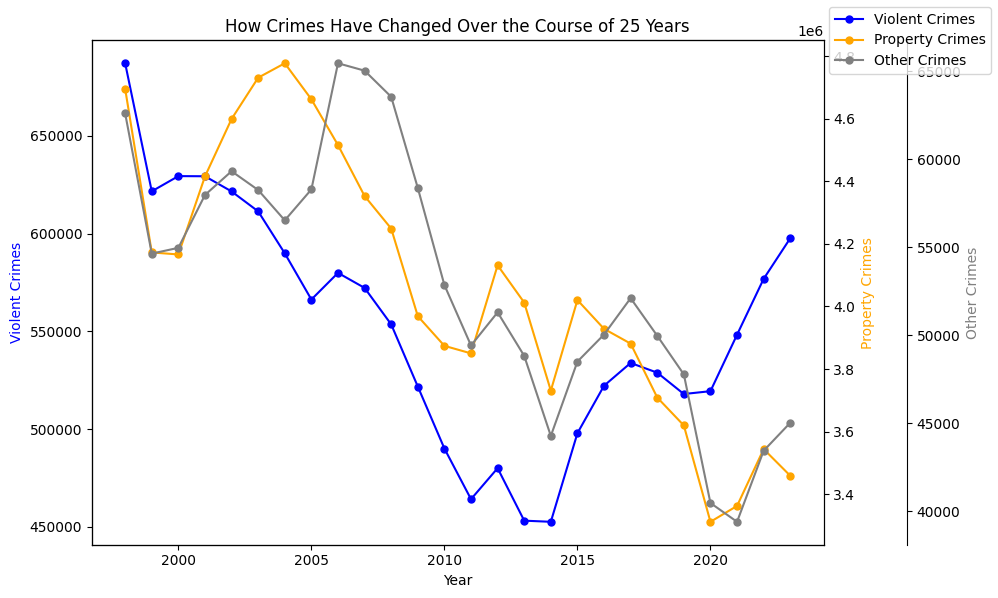

In [12]:
# Plotting the data with independent y-axes and simplified line styles
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create figure and axis for the first plot

# Plot Violent Crimes Total on the first y-axis with markers
ax1.plot(combined_df['Year'], combined_df['Violent Crimes Total'], color='blue', linestyle='-', marker='o', markersize=5, label='Violent Crimes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crimes')

# Create a second y-axis (Property Crimes Total) with markers
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
ax2.plot(combined_df['Year'], combined_df['Property Crimes Total'], color='orange', linestyle='-', marker='o', markersize=5, label='Property Crimes')

# Create a third y-axis (Other Crimes Total) with markers
ax3 = ax1.twinx()  # Create another y-axis that shares the same x-axis
ax3.spines['right'].set_position(('outward', 60))  # Offset the spine of the third y-axis
ax3.plot(combined_df['Year'], combined_df['Other Crimes Total'], color='gray', linestyle='-', marker='o', markersize=5, label='Other Crimes')

# Add y-axis labels
ax1.set_ylabel('Violent Crimes', color='blue')
ax2.set_ylabel('Property Crimes', color='orange')
ax3.set_ylabel('Other Crimes', color='gray')

# Add a title
plt.title('How Crimes Have Changed Over the Course of 25 Years')

# Adjust layout and add legend with loc='upper right'
fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_9964\1604989376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Total Crimes'] = combined_df['Violent Crimes Total'] + combined_df['Property Crimes Total'] + combined_df['Other Crimes Total']


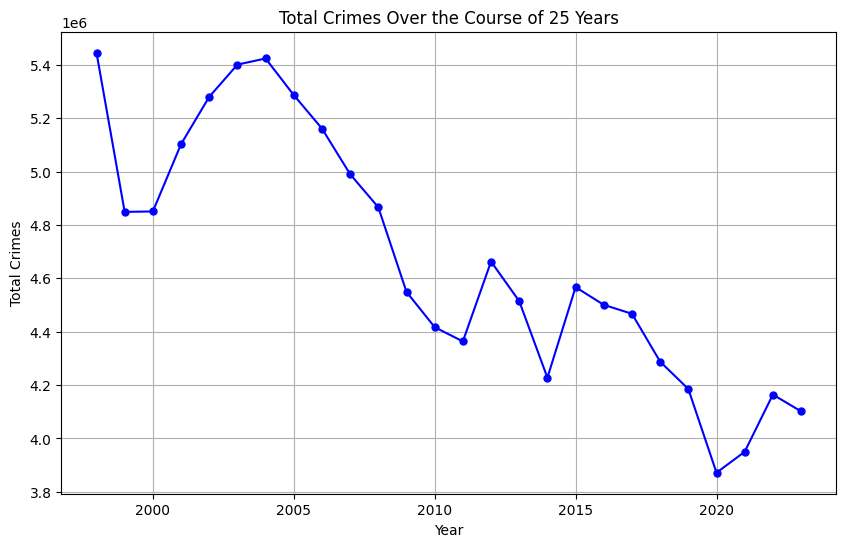

In [13]:
# Calculate total crimes
combined_df['Total Crimes'] = combined_df['Violent Crimes Total'] + combined_df['Property Crimes Total'] + combined_df['Other Crimes Total']

# Plotting the data as a single line plot
plt.figure(figsize=(10, 6))
plt.plot(combined_df['Year'], combined_df['Total Crimes'], color='blue', linestyle='-', marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Total Crimes Over the Course of 25 Years')
plt.grid(True)
plt.show()

In [14]:
# Rename columns
new_column_names = {
    'Violent Crimes': 'Violent_Crimes',
    'Homicide': 'Homicide',
    'Rape (Forcible Rape prior to 2014)': 'Sexual_Assault_Prior_to_2014',
    'Rape': 'Sexual_Assault',
    'Attempted Rape': 'Attempted_Sexual_Assault',
    'Robbery': 'Robbery',
    'Firearm': 'Firearm',
    'Knife or Cutting Instrument': 'Knife_or_Cutting_Instrument',
    'Other Weapon': 'Other_Weapon',
    'Inflation Rate YOY, From Previous Dec.': 'Inflation_Rate',
    'Federal Funds Rate': 'Federal_Funds_Rate',
    'Business Cycle': 'Business_Cycle',
    'Events Affecting Inflation': 'Events_Affecting_Inflation'
}

df = df.rename(columns=new_column_names)

# Display the updated DataFrame
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation,Violent Crimes Total,Property Crimes Total,Other Crimes Total
0,1998,229766.0,2170.0,9777.0,7939.0,1838.0,68752.0,23799.0,6857.0,6699.0,...,4687.0,4346.0,5281.0,1.60%,4.75%,Expansion (4.5%),Long-term capital management crisis,687128.0,4695338.0,62602.0
1,1999,207874.0,2006.0,9443.0,7757.0,1686.0,60027.0,19912.0,6091.0,5861.0,...,4655.0,4133.0,5666.0,2.70%,5.50%,Expansion (4.8%),Glass-Steagall Act repealed,621616.0,4172603.0,54636.0
2,2000,210492.0,2074.0,9785.0,8197.0,1588.0,60243.0,20971.0,6078.0,5610.0,...,4669.0,4616.0,5121.0,3.40%,6.50%,Expansion (4.1%),Tech bubble burst,629402.0,4166142.0,54965.0
3,2001,210510.0,2201.0,9882.0,8219.0,1663.0,63299.0,22606.0,6512.0,6034.0,...,4612.0,5357.0,5091.0,1.60%,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks,629329.0,4415379.0,57966.0
4,2002,207988.0,2392.0,10176.0,8620.0,1556.0,64805.0,23444.0,6599.0,5769.0,...,4119.0,5473.0,4415.0,2.40%,1.25%,Expansion (1.7%),War on Terror,621572.0,4599002.0,59316.0


In [15]:
df['Inflation_Rate'] = df['Inflation_Rate'].str.rstrip('%').astype(float) / 100.0
df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation,Violent Crimes Total,Property Crimes Total,Other Crimes Total
0,1998,229766.0,2170.0,9777.0,7939.0,1838.0,68752.0,23799.0,6857.0,6699.0,...,4687.0,4346.0,5281.0,0.016,4.75%,Expansion (4.5%),Long-term capital management crisis,687128.0,4695338.0,62602.0
1,1999,207874.0,2006.0,9443.0,7757.0,1686.0,60027.0,19912.0,6091.0,5861.0,...,4655.0,4133.0,5666.0,0.027,5.50%,Expansion (4.8%),Glass-Steagall Act repealed,621616.0,4172603.0,54636.0
2,2000,210492.0,2074.0,9785.0,8197.0,1588.0,60243.0,20971.0,6078.0,5610.0,...,4669.0,4616.0,5121.0,0.034,6.50%,Expansion (4.1%),Tech bubble burst,629402.0,4166142.0,54965.0
3,2001,210510.0,2201.0,9882.0,8219.0,1663.0,63299.0,22606.0,6512.0,6034.0,...,4612.0,5357.0,5091.0,0.016,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks,629329.0,4415379.0,57966.0
4,2002,207988.0,2392.0,10176.0,8620.0,1556.0,64805.0,23444.0,6599.0,5769.0,...,4119.0,5473.0,4415.0,0.024,1.25%,Expansion (1.7%),War on Terror,621572.0,4599002.0,59316.0


In [16]:
# Descriptive statistics
print(df.describe())

              Year  Violent_Crimes     Homicide  Sexual_Assault_Prior_to_2014  \
count    26.000000       26.000000    26.000000                     26.000000   
mean   2010.500000   184877.576923  2062.230769                  10840.384615   
std       7.648529    20406.489141   262.245886                   2587.537008   
min    1998.000000   151425.000000  1679.000000                   7459.000000   
25%    2004.250000   173369.750000  1837.000000                   9088.500000   
50%    2010.500000   184389.500000  2040.000000                   9781.000000   
75%    2016.750000   199236.500000  2245.000000                  13631.000000   
max    2023.000000   229766.000000  2503.000000                  15500.000000   

       Sexual_Assault  Attempted_Sexual_Assault       Robbery       Firearm  \
count       26.000000                 26.000000     26.000000     26.000000   
mean      9740.192308               1100.192308  57987.807692  18029.346154   
std       2733.865235            

In [17]:
# df['Violent_Crimes'] = df['Violent_Crimes'].str.replace(',', '').astype(int)

In [18]:
# df['Robbery'] = df['Robbery'].str.replace(',', '').astype(int)

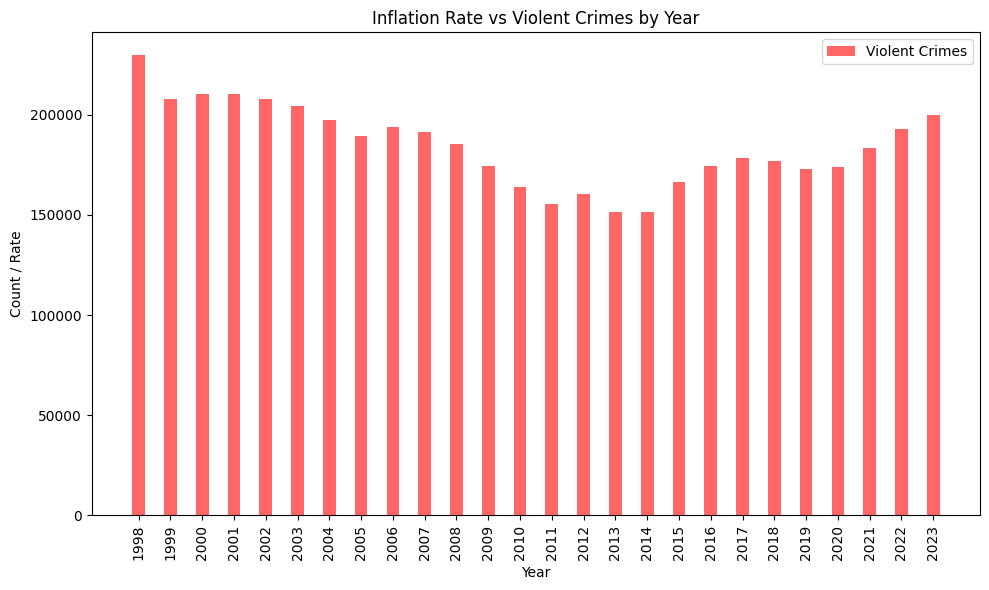

In [19]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(df['Year'] , df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='red', alpha=0.6,  align='center')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.title('Inflation Rate vs Violent Crimes by Year')
plt.xticks(df['Year'])
plt.legend()

plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
filtered_df = df[(df['Year'] != 2021) & (df['Year'] != 2022) & (df['Year'] >= 1998) & (df['Year'] <= 2023)]

filtered_df.head()

# filtered_df = df[(df['Year'] >= 1998) & (df['Year'] <= 2023)]

# filtered_df.head()

,Year,Violent_Crimes,Homicide,Sexual_Assault_Prior_to_2014,Sexual_Assault,Attempted_Sexual_Assault,Robbery,Firearm,Knife_or_Cutting_Instrument,Other_Weapon,...,Structural Property,Mobile Property,Other Property,Inflation_Rate,Federal_Funds_Rate,Business_Cycle,Enents Affecting Inflation,Violent Crimes Total,Property Crimes Total,Other Crimes Total
0,1998,229766.0,2170.0,9777.0,7939.0,1838.0,68752.0,23799.0,6857.0,6699.0,...,4687.0,4346.0,5281.0,0.016,4.75%,Expansion (4.5%),Long-term capital management crisis,687128.0,4695338.0,62602.0
1,1999,207874.0,2006.0,9443.0,7757.0,1686.0,60027.0,19912.0,6091.0,5861.0,...,4655.0,4133.0,5666.0,0.027,5.50%,Expansion (4.8%),Glass-Steagall Act repealed,621616.0,4172603.0,54636.0
2,2000,210492.0,2074.0,9785.0,8197.0,1588.0,60243.0,20971.0,6078.0,5610.0,...,4669.0,4616.0,5121.0,0.034,6.50%,Expansion (4.1%),Tech bubble burst,629402.0,4166142.0,54965.0
3,2001,210510.0,2201.0,9882.0,8219.0,1663.0,63299.0,22606.0,6512.0,6034.0,...,4612.0,5357.0,5091.0,0.016,1.75%,"March peak, November trough (1.0%)",Bush tax cut; 9/11 attacks,629329.0,4415379.0,57966.0
4,2002,207988.0,2392.0,10176.0,8620.0,1556.0,64805.0,23444.0,6599.0,5769.0,...,4119.0,5473.0,4415.0,0.024,1.25%,Expansion (1.7%),War on Terror,621572.0,4599002.0,59316.0


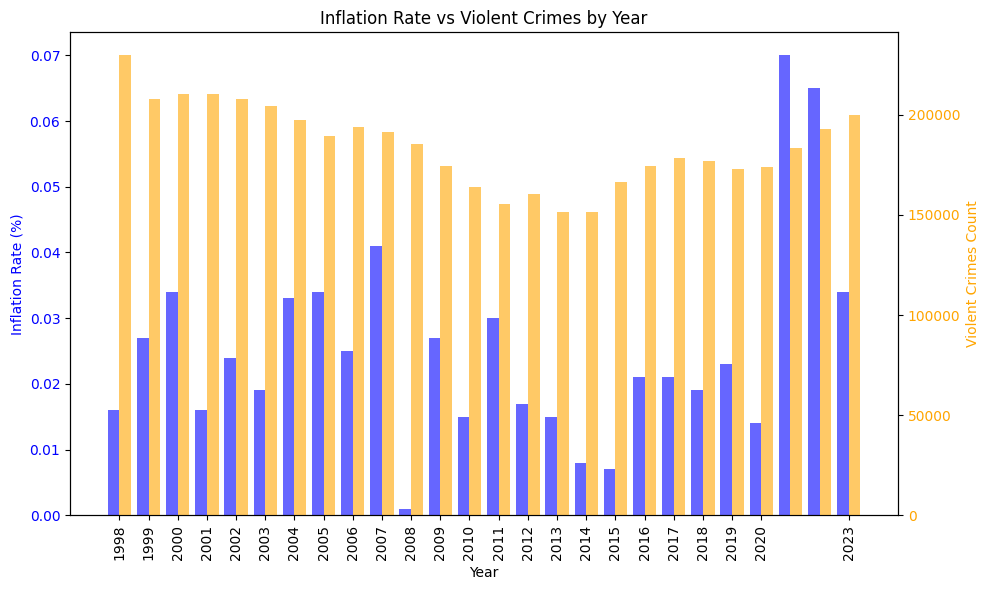

In [21]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(df['Year'] - 0.2, df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Violent Crimes by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(df['Year'] + 0.2, df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Violent Crimes Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)

# Display the plot
fig.tight_layout()
plt.show()

In [22]:
print(df.dtypes)

Year                              int64
Violent_Crimes                  float64
Homicide                        float64
Sexual_Assault_Prior_to_2014    float64
Sexual_Assault                  float64
                                 ...   
Business_Cycle                   object
Enents Affecting Inflation       object
Violent Crimes Total            float64
Property Crimes Total           float64
Other Crimes Total              float64
Length: 65, dtype: object


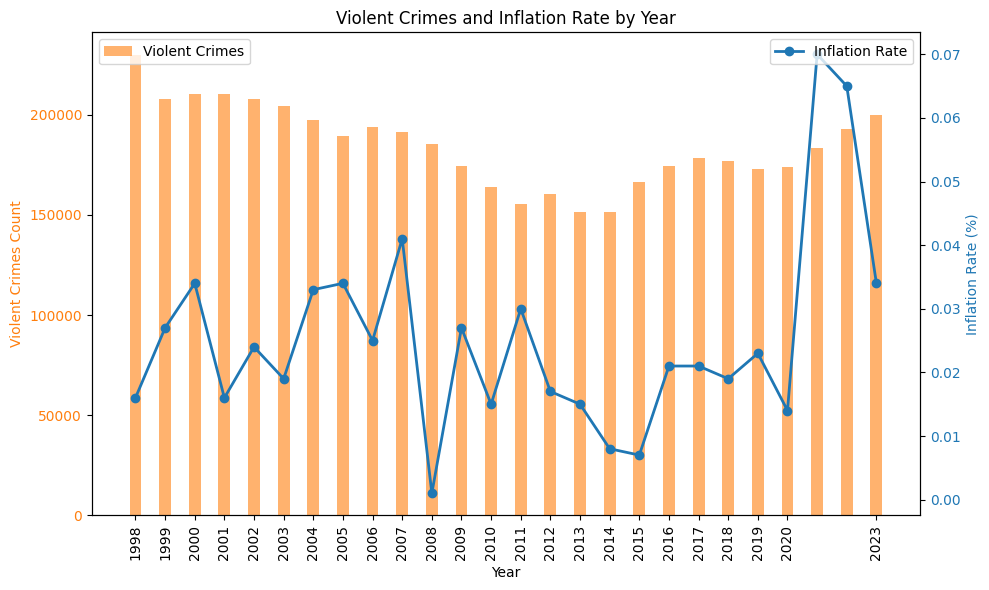

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars for Violent Crimes
ax1.bar(df['Year'], df['Violent_Crimes'], width=0.4, label='Violent Crimes', color='#ff7f0e', alpha=0.6, align='center')

# Adding labels and title for the first plot (Violent Crimes)
ax1.set_xlabel('Year')
ax1.set_ylabel('Violent Crimes Count', color='#ff7f0e')
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

# Creating the second y-axis for Inflation Rate (line plot)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Inflation_Rate'], marker='o', color='#1f77b4', linewidth=2, label='Inflation Rate')

# Adding labels and title for the second plot (Inflation Rate)
ax2.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Adding title and legend
ax1.set_title('Violent Crimes and Inflation Rate by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

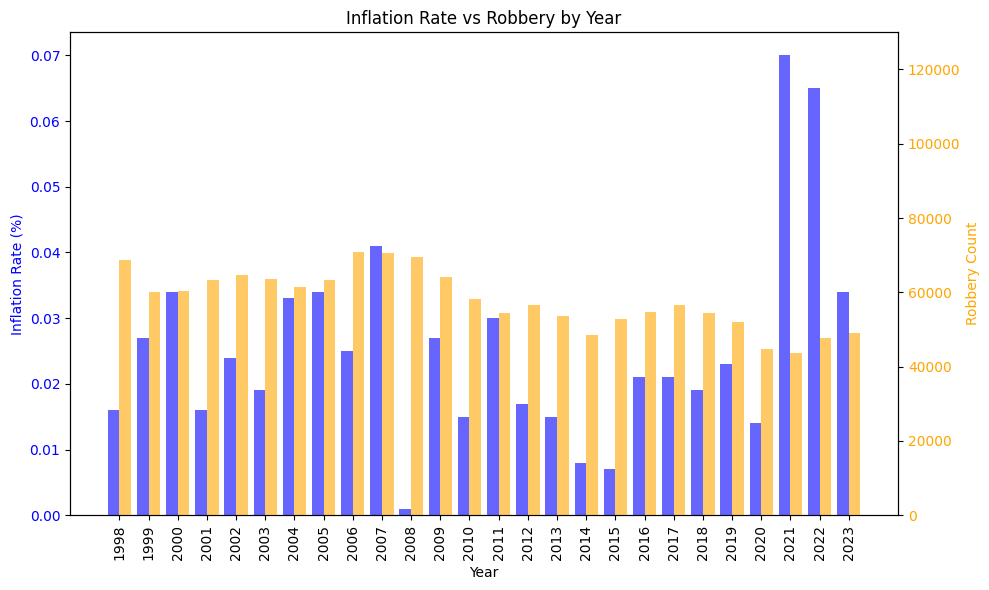

In [24]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(df['Year'] - 0.2, df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(df['Year'] + 0.2, df['Robbery'], width=0.4, label='Robbery', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 130000)

# Set x ticks to be the years
ax1.set_xticks(df['Year'])
ax1.set_xticklabels(df['Year'], rotation=90)

# Display the plot
fig.tight_layout()
plt.show()

In [25]:
correlation = df['Inflation_Rate'].corr(df['Robbery'])

print(f'Correlation between Value1 and Value2: {correlation}')

Correlation between Value1 and Value2: -0.2586366564394769


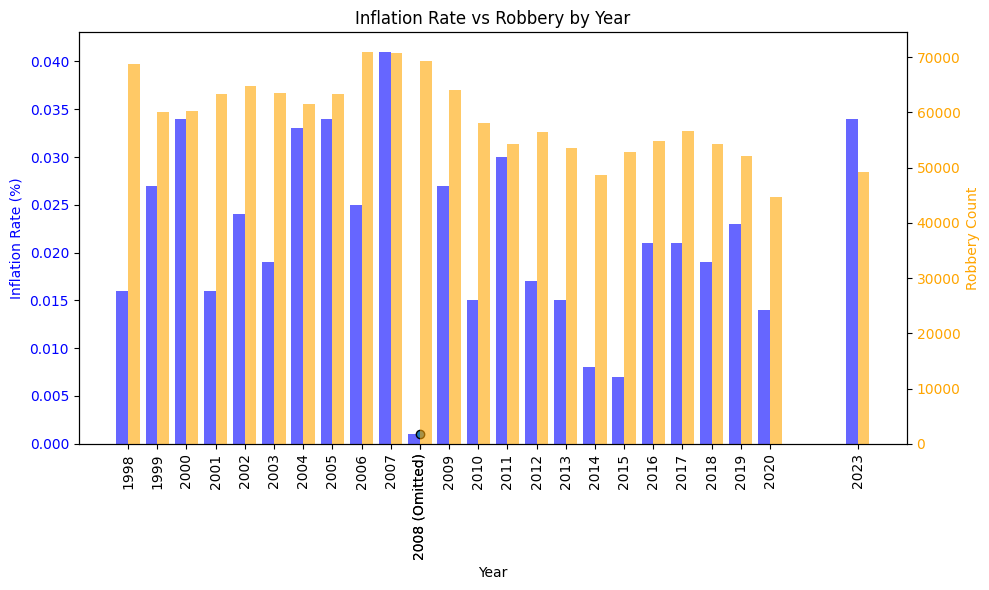

In [26]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first bar plot (Inflation Rate)
ax1.bar(filtered_df['Year'] - 0.2, filtered_df['Inflation_Rate'], width=0.4, label='Inflation Rate', color='blue', alpha=0.6, align='center')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Violent Crimes
ax2 = ax1.twinx()
ax2.bar(filtered_df['Year'] + 0.2, filtered_df['Robbery'], width=0.4, label='Robbery', color='orange', alpha=0.6, align='center')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)
omitted_year = 2008
omitted_inflation_rate = .001
ax1.scatter(omitted_year, omitted_inflation_rate, color='tab:blue', edgecolor='black', zorder=5)
xticks = list(filtered_df['Year']) + [omitted_year]
xtick_labels = [str(year) if year != 2008 else '2008 (Omitted)' for year in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

# Display the plot
fig.tight_layout()
plt.show()

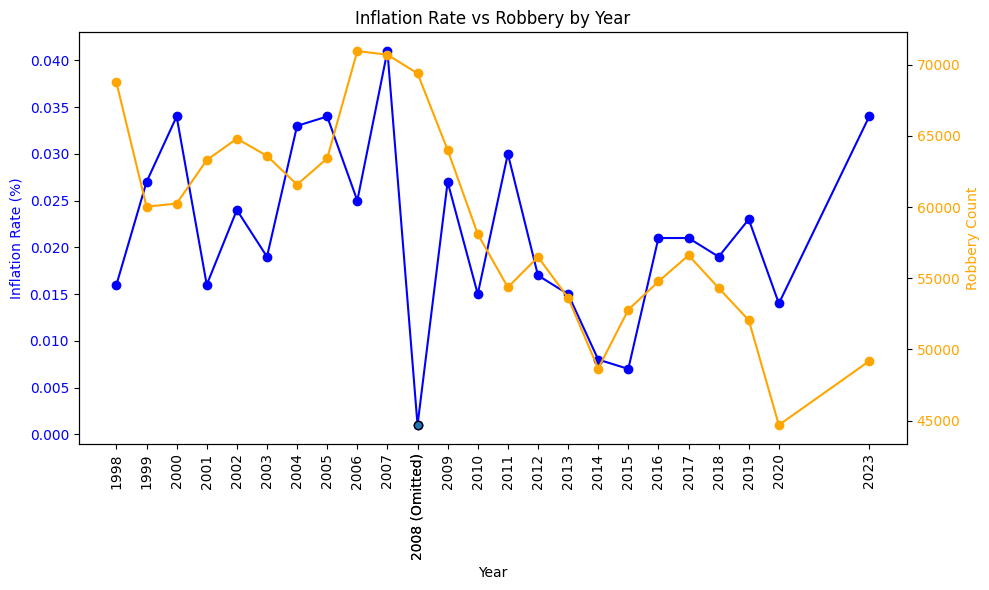

In [27]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first line plot (Inflation Rate)
ax1.plot(filtered_df['Year'], filtered_df['Inflation_Rate'], label='Inflation Rate', color='blue', marker='o')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Inflation Rate vs Robbery by Year')

# Creating the second y-axis for Robbery
ax2 = ax1.twinx()
ax2.plot(filtered_df['Year'], filtered_df['Robbery'], label='Robbery', color='orange', marker='o')

# Adding labels and title for the second plot
ax2.set_ylabel('Robbery Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x ticks to be the years
ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)

omitted_year = 2008
omitted_inflation_rate = .001
ax1.scatter(omitted_year, omitted_inflation_rate, color='tab:blue', edgecolor='black', zorder=5)
xticks = list(filtered_df['Year']) + [omitted_year]
# xtick_labels = [str(year) if year != 2008 else '2008' for year in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

# Display the plot
fig.tight_layout()
plt.show()

In [28]:
# fig, ax1 = plt.subplots(figsize=(10, 6)) # Plotting the bars for Violent Crimes 
# ax1.bar(df[‘Year’], df[‘Violent_Crimes’], width=0.4, label=‘Violent Crimes’, color=‘#FF7F0E’, alpha=0.6, align=‘center’) 
# # Adding labels and title for the first plot (Violent Crimes) 
# ax1.set_xlabel(‘Year’) ax1.set_ylabel(‘Violent Crimes Count’, color=‘#FF7F0E’) 
# ax1.tick_params(axis=‘y’, labelcolor=‘#FF7F0E’) 
# # Adding xticks for years ax1.set_xticks(df[‘Year’]) ax1.set_xticklabels(df[‘Year’], rotation=90) # Creating the second y-axis for Inflation Rate (line plot) ax2 = ax1.twinx() ax2.plot(df[‘Year’], df[‘Inflation_Rate’], marker=‘o’, color=‘#1F77B4’, linewidth=1, label=‘Inflation Rate’) # Adding labels and title for the second plot (Inflation Rate) ax2.set_ylabel(‘Inflation Rate (%)‘, color=‘#1F77B4’) ax2.tick_params(axis=‘y’, labelcolor=‘#1F77B4’) # Adding title and legend ax1.set_title(‘Violent Crimes and Inflation Rate by Year’) ax1.legend(loc=‘upper left’) ax2.legend(loc=‘upper right’) # Display the plot plt.tight_layout() plt.show()

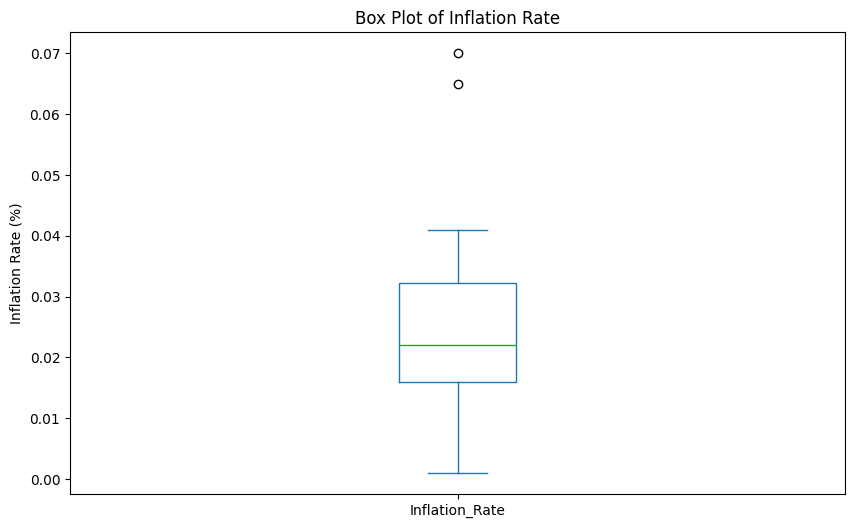

In [29]:
# Creating the box plot
plt.figure(figsize=(10, 6))
df['Inflation_Rate'].plot.box()
plt.title('Box Plot of Inflation Rate')
plt.ylabel('Inflation Rate (%)')

# Display the plot
plt.show()

In [30]:
# Calculate the correlation coefficient
correlation = filtered_df['Inflation_Rate'].corr(filtered_df['Robbery'])

print(f"Correlation Coefficient between Inflation Rate and Robbery Count: {correlation}")

Correlation Coefficient between Inflation Rate and Robbery Count: 0.21430749142001404


In [31]:
omitted_year = 2008
omitted_inflation_rate = .001
ax1.scatter(omitted_year, omitted_inflation_rate, color='tab:blue', edgecolor='black', zorder=5)
xticks = list(filtered_df['Year']) + [omitted_year]
xtick_labels = [str(year) if year != 2008 else '2008 (Omitted)' for year in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

[Text(1998, 0, '1998'),
 Text(1999, 0, '1999'),
 Text(2000, 0, '2000'),
 Text(2001, 0, '2001'),
 Text(2002, 0, '2002'),
 Text(2003, 0, '2003'),
 Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008 (Omitted)'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2023, 0, '2023'),
 Text(2008, 0, '2008 (Omitted)')]

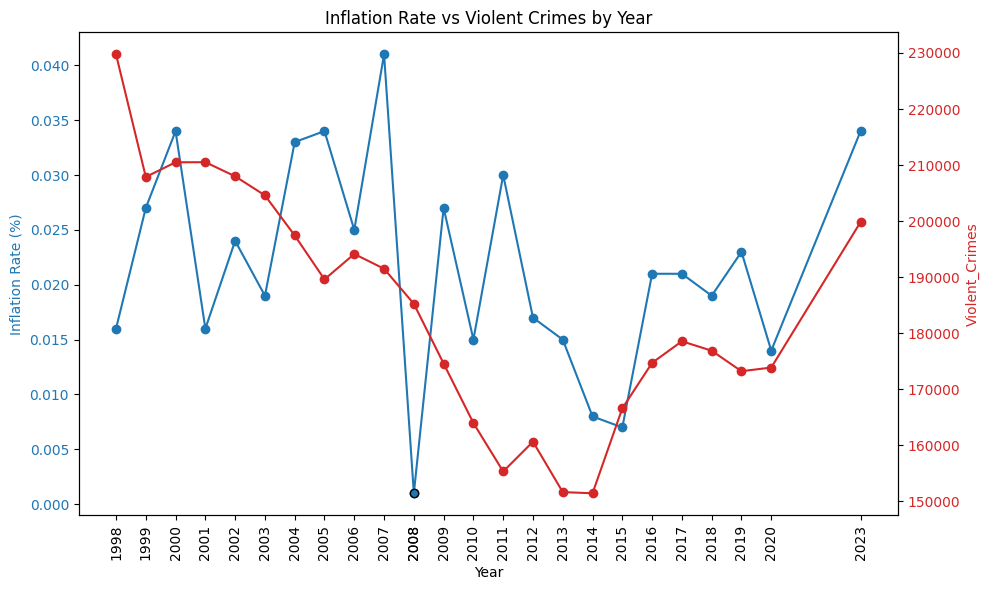

In [32]:
omitted_year = 2008
omitted_inflation_rate = .001

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first line plot (Inflation Rate)
ax1.plot(filtered_df['Year'], filtered_df['Inflation_Rate'], label='Inflation Rate', color='#1f77b4', marker='o')

# Adding labels and title for the first plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_title('Inflation Rate vs Violent Crimes by Year')
ax1.scatter(omitted_year, omitted_inflation_rate, color='tab:blue', edgecolor='black', zorder=5)

# Creating the second y-axis for Robbery
ax2 = ax1.twinx()
ax2.plot(filtered_df['Year'], filtered_df['Violent_Crimes'], label='Violent_Crimes', color='#d62728', marker='o')

# Adding labels and title for the second plot
ax2.set_ylabel('Violent_Crimes', color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

# Set x ticks to be the years
ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)

xticks = list(filtered_df['Year']) + [omitted_year]
xtick_labels = [str(year) if year != 2008 else '2008' for year in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

# Display the plot
fig.tight_layout()
plt.show()

In [33]:
correlation = filtered_df['Inflation_Rate'].corr(filtered_df['Violent_Crimes'])

print(f"Correlation Coefficient between Inflation Rate and Robbery Count: {correlation}")

Correlation Coefficient between Inflation Rate and Robbery Count: 0.3319784778095128


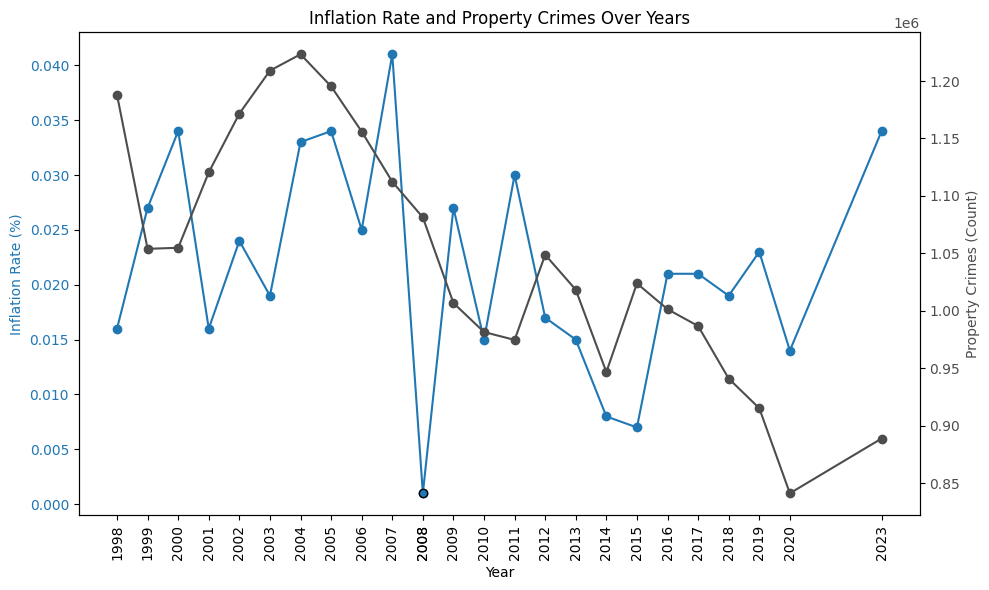

In [34]:
# Data for the omitted point
omitted_year = 2008
omitted_inflation_rate = .001

# Creating the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Inflation Rate on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate (%)', color='tab:blue')
ax1.plot(filtered_df['Year'], filtered_df['Inflation_Rate'], marker='o', color='tab:blue', label='Inflation Rate (%)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.scatter(omitted_year, omitted_inflation_rate, color='tab:blue', edgecolor='black', zorder=5)

# Creating a second y-axis for Property Crimes
ax2 = ax1.twinx()
ax2.set_ylabel('Property Crimes (Count)', color='#4D4D4D')
ax2.plot(filtered_df['Year'], filtered_df['Property Crimes'], marker='o', color='#4D4D4D', label='Property Crimes (Count)')
ax2.tick_params(axis='y', labelcolor='#4D4D4D')


# Adding a title
plt.title('Inflation Rate and Property Crimes Over Years')

ax1.set_xticks(filtered_df['Year'])
ax1.set_xticklabels(filtered_df['Year'], rotation=90)

xticks = list(filtered_df['Year']) + [omitted_year]
xtick_labels = [str(year) if year != 2008 else '2008' for year in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xtick_labels)

# Displaying the graph
fig.tight_layout()
plt.show()

In [35]:
# Calculate the correlation coefficient
correlation = filtered_df['Inflation_Rate'].corr(filtered_df['Property Crimes'])

print(f"Correlation Coefficient between Inflation Rate and Robbery Count: {correlation}")

Correlation Coefficient between Inflation Rate and Robbery Count: 0.20258991786245384


In [36]:
omitted_year_data = df[df['Year'] == 2008]

# Extracting the values for 2008
if not omitted_year_data.empty:
    omitted_inflation_rate = omitted_year_data['Inflation_Rate'].values[0]
    omitted_property_crimes = omitted_year_data['Property Crimes'].values[0]
    print(f"2008 Inflation Rate: {omitted_inflation_rate}")
    print(f"2008 Property Crimes: {omitted_property_crimes}")
else:
    print("Data for the year 2008 is not found.")

2008 Inflation Rate: 0.001
2008 Property Crimes: 1081272.0


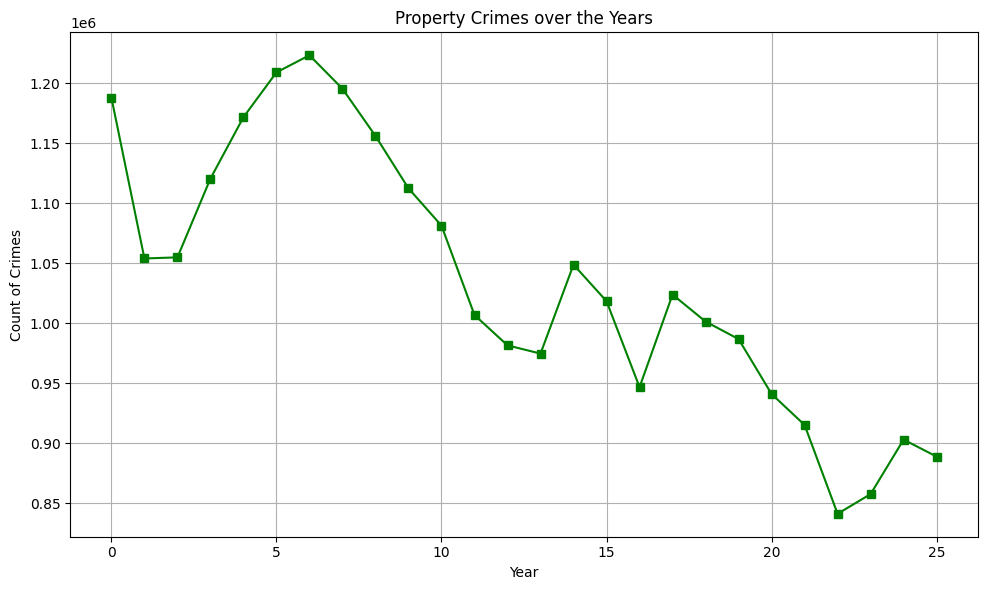

In [41]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Property Crimes over the Years")

plt.grid()
plt.tight_layout()
plt.plot(df.index, df['Property Crimes'], marker='s', linestyle='-', color='g', label='Property Crimes')


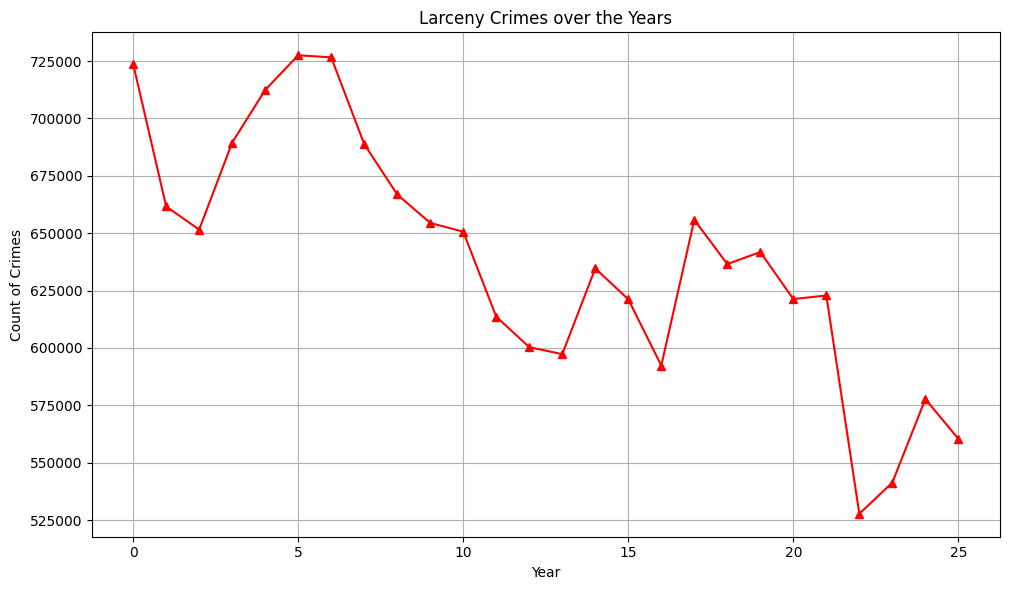

In [43]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Count of Crimes")
plt.title("Larceny Crimes over the Years")
plt.grid()
plt.tight_layout()
plt.plot(df.index, df['Larceny-Theft'], marker='^', linestyle='-', color='r', label='Larceny-Theft')

In [46]:
# Grabbing columns into a new dataframe for ease of use, and to prevent original df from malfunctioning

violent_crimes = df["Violent_Crimes"]
property_crimes = df["Property Crimes"]
larceny_crimes = df["Larceny-Theft"]
target_crimes = {"Violent Crimes" : violent_crimes,
                 "Property Crimes" : property_crimes,
                 "Larceny-Theft Crimes" : larceny_crimes}

crime_overview_df = pd.DataFrame(target_crimes)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(crime_overview_df)


# # Convert scaled data back to DataFrame
df_scaled_crime = pd.DataFrame(scaled_data, columns=crime_overview_df.columns, index=df["Year"])
df_scaled_crime


,Violent Crimes,Property Crimes,Larceny-Theft Crimes
Year,,,
1998,1.000000,0.907635,0.981009
1999,0.720555,0.556825,0.670216
2000,0.753973,0.559243,0.619765
2001,0.754203,0.730995,0.809610
2002,0.722010,0.864877,0.924376
2003,0.678648,0.962720,1.000000
2004,0.587266,1.000000,0.995430
2005,0.487203,0.926999,0.806251
2006,0.545091,0.823962,0.696374


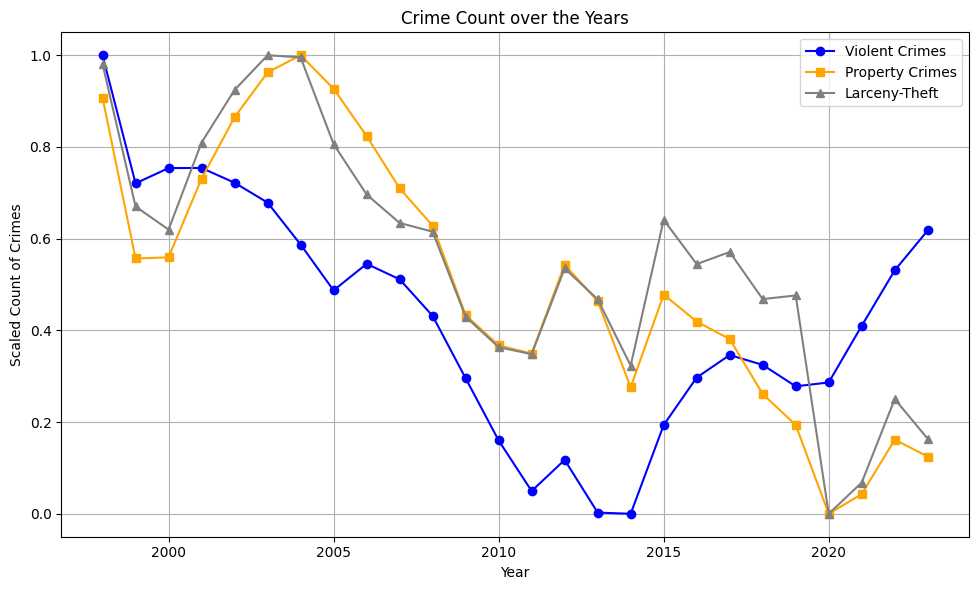

In [47]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.xlabel("Year")
plt.ylabel("Scaled Count of Crimes")
plt.title("Crime Count over the Years")

plt.grid()
plt.tight_layout()
# # Plot each series as a separate line
plt.plot(df_scaled_crime.index, df_scaled_crime['Violent Crimes'], marker='o', linestyle='-', color='b', label='Violent Crimes')
plt.plot(df_scaled_crime.index, df_scaled_crime['Property Crimes'], marker='s', linestyle='-', color='orange', label='Property Crimes')
plt.plot(df_scaled_crime.index, df_scaled_crime['Larceny-Theft Crimes'], marker='^', linestyle='-', color='grey', label='Larceny-Theft')
plt.legend()

In [48]:
total_crimes_count = df["Violent_Crimes"] + df["Property Crimes"] + df["Larceny-Theft"]
total_crimes_count_df = pd.DataFrame(total_crimes_count)
total_crimes_count_df.columns = ["Total Crime Count"]
total_crimes_count_df["Year"] = df["Year"]
total_crimes_count_df["Scaled Count"] = total_crimes_count_df["Total Crime Count"] * 0.000001
total_crimes_count_df

,Total Crime Count,Year,Scaled Count
0,2141481.0,1998,2.141481
1,1923453.0,1999,1.923453
2,1916916.0,2000,1.916916
3,2020488.0,2001,2.020488
4,2092051.0,2002,2.092051
5,2141148.0,2003,2.141148
6,2147321.0,2004,2.147321
7,2073794.0,2005,2.073794
8,2017007.0,2006,2.017007
9,1958340.0,2007,1.958340


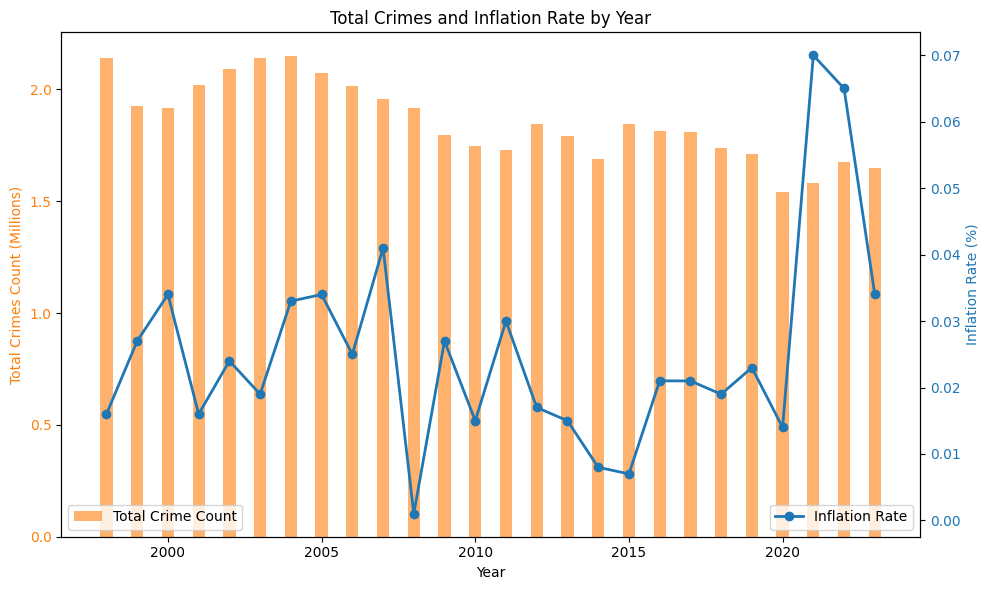

In [49]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars for Total Crimes
ax1.bar(total_crimes_count_df['Year'], total_crimes_count_df['Scaled Count'], label='Total Crime Count', width=0.4,
        color='#ff7f0e', alpha=0.6, align='center')

# Adding labels and title for the first plot (Total Crime)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crimes Count (Millions)', color='#ff7f0e')
ax1.tick_params(axis='y', labelcolor='#ff7f0e')

# Creating the second y-axis for Inflation Rate (line plot)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Inflation_Rate'], marker='o', color='#1f77b4', linewidth=2, label='Inflation Rate')

# Adding labels and title for the second plot (Inflation Rate)
ax2.set_ylabel('Inflation Rate (%)', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')

# Adding title and legend
ax1.set_title('Total Crimes and Inflation Rate by Year')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

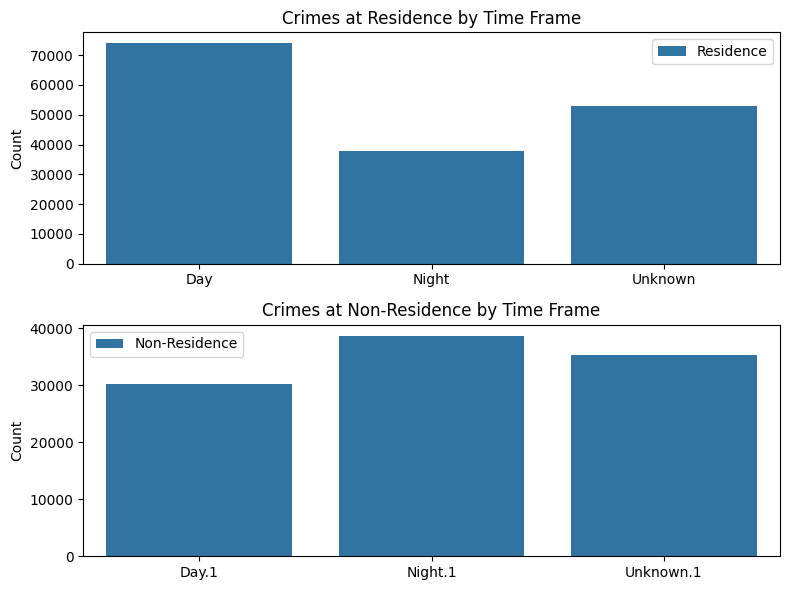

In [50]:
# Remove commas and convert columns to numeric - combined approach Once commas are removed,converts string to integer
columns_to_convert = ['Residence.1', 'Non-Residence', 'Day', 'Night', 'Unknown','Day.1','Night.1','Unknown.1']
california_crimes[columns_to_convert] = california_crimes[columns_to_convert].replace(',', '', regex=True).astype(int)

# Selecting relevant columns for plotting
crime_data = california_crimes[['Residence.1', 'Non-Residence', 'Day', 'Night', 'Unknown','Day.1', 'Night.1', 'Unknown.1']]

# Plotting
plt.figure(figsize=(8, 6))

#(sns.barplot is a powerful tool for visualizing relationships between categorical and numerical variables,
#providing clear insights into data distributions across different categories.

# Plot for Residence
plt.subplot(2, 1, 1)
sns.barplot(x=['Day', 'Night', 'Unknown'], y=crime_data.loc[0, ['Day', 'Night', 'Unknown']], label='Residence')
plt.title('Crimes at Residence by Time Frame')
plt.ylabel('Count')
plt.legend()

# Plot for Non-Residence
plt.subplot(2, 1, 2)
sns.barplot(x=['Day.1', 'Night.1', 'Unknown.1'], y=crime_data.loc[0, ['Day.1', 'Night.1', 'Unknown.1']], label='Non-Residence')
plt.title('Crimes at Non-Residence by Time Frame')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()